In [2]:
import core.utils.configuration

Config = core.utils.configuration.initialize_config()

with Config:
    Config.Data.Type = 'paired_images_with_contrast_label'
    Config.Data.Image.Preprocess = 'GrayImage' #'GrayImage' 'RGBImage' 'BGRImage' 
    Config.Data.Image.Postprocess = 'CLAHE_float' #'CLAHE_float' 'CLAHE_int'
    
    Config.Model.Task = 'SimpleSeg'
    Config.Model.Param = dict(
        backbone_name = 'UniversalUnet', #'UniversalUnet' 'EffiNetB4Unet_AttDs' 'EffiNetB4Unet_AttRes'
        backbone_param = dict(
            encoder_name='resnet50',
            encoder_weights='imagenet',
            in_channels=1,
            out_channels=4),
        seg_head_name = 'Head_1',
        seg_head_param = dict(in_channels=4)
        )
    
    Config.Training.Settings.TrailNumber = 1
    Config.Training.Settings.Epochs = 30
    Config.Training.Settings.AmpScaleTrain = True
    
    Config.Training.Settings.Random.RootSeed = 100
    Config.Training.Settings.Random.cuDNN.Deterministic = True
    Config.Training.Settings.Random.cuDNN.Benchmark = True
    
    Config.Training.Dataset.Path = r'D:\Datasets\Cardiac_Catheterization\train'
    Config.Training.Dataset.NumWorkers = 0
    Config.Training.Dataset.PinMemory = False
    Config.Training.Dataset.PrefetchFactor = 2
    Config.Training.Dataset.Train.BatchSize = 8
    Config.Training.Dataset.Val.Ratio = 0.1
    Config.Training.Dataset.Val.BatchSize = 16
    Config.Training.Dataset.Augmentation.Prob = 'Constant(0.8)'
    Config.Training.Dataset.Augmentation.Content = [
        'GridDistortion             -p:Constant(0.8)',
        'ElasticTransform           -p:Constant(0.8)',
        'Affine                     -p:Constant(0.8)',
        'GaussNoise                 -p:Constant(0.8)',
        'Blur                       -p:Constant(0.8)',
        'Downscale                  -p:Constant(0.8)',
        'RandomBrightnessContrast   -p:Constant(0.8)'
    ]
    
    Config.Training.Model.FreezeBackbone = False
    
    Config.Training.Losses = [
        'BCELoss2D  -subject:"mask"           -weights:"contrast_exist" -schedule:WarmUp(warmup_epochs=5,max_value=2)  -smooth:1',
        'DiceLoss   -subject:"mask"           -weights:"contrast_exist" -schedule:Constant(1)',
        'BCELoss    -subject:"contrast_exist" -weights:None             -schedule:Constant(1)'
    ]
    Config.Training.Optimizer = 'Adam -lr:0.001'
    Config.Training.LearningSchedule = ''
    Config.Training.Metrics = [
        'BinaryAccuracy2D   -subject:"mask"           -weights:"contrast_exist" -threshold:0.5  -smooth:1',
        'DiceAccuracy       -subject:"mask"           -weights:"contrast_exist" -threshold:0.5',
        'BinaryAccuracy     -subject:"contrast_exist" -weights:None             -threshold:0.5'
    ]
    
    Config.Record.Frequence = 8
    Config.Record.RootPath = 'Results'
    Config.Record.FolderName = 'resnet_pretrained'
    Config.Record.Note = ''

In [3]:
import core.utils
import matplotlib.pyplot as plt

dataloaders = core.utils.get_train_dataloaders(Config,True)

for batch_data in dataloaders['train']():
    break

EPOCH: None:   0%|          | 0/691 [00:03<?, ?it/s]


False


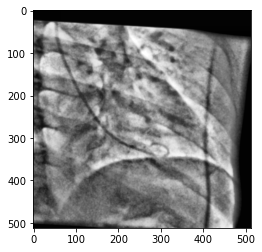

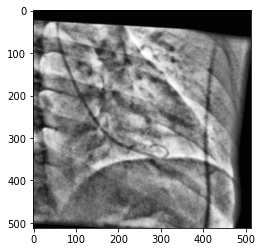

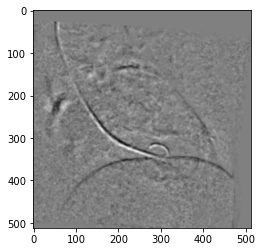

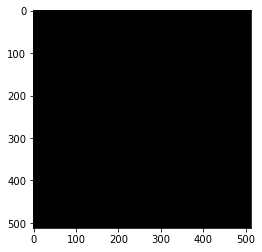

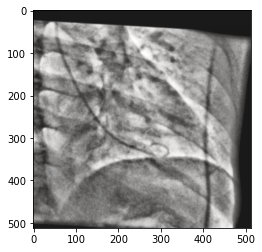

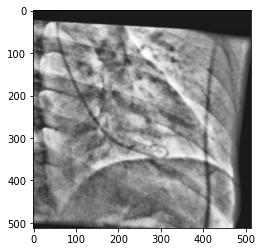

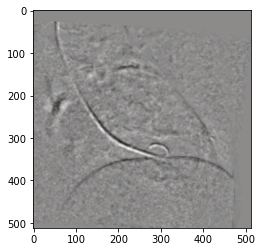

In [4]:
i = 0
print(bool(batch_data['contrast_exist'][i].item()))
plt.imshow(batch_data['image'][i,0],cmap='gray')
plt.show()
plt.imshow(batch_data['image'][i,1],cmap='gray')
plt.show()
plt.imshow(batch_data['image'][i,2],cmap='gray')
plt.show()
plt.imshow(batch_data['mask'][i],cmap='gray')
plt.show()

plt.imshow(batch_data['image'][i,0],cmap='gray')
plt.imshow(batch_data['mask'][i],cmap='Reds',alpha=0.1)
plt.show()
plt.imshow(batch_data['image'][i,1],cmap='gray')
plt.imshow(batch_data['mask'][i],cmap='Reds',alpha=0.1)
plt.show()
plt.imshow(batch_data['image'][i,2],cmap='gray')
plt.imshow(batch_data['mask'][i],cmap='Reds',alpha=0.1)
plt.show()

False


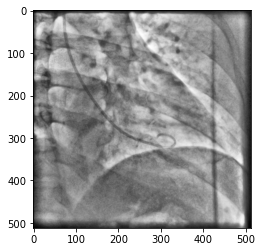

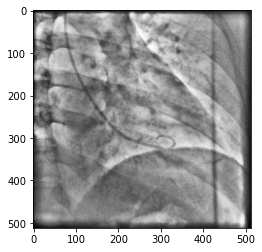

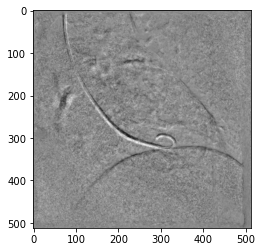

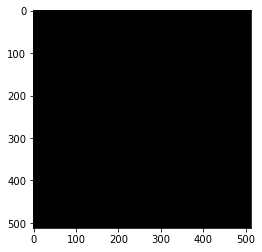

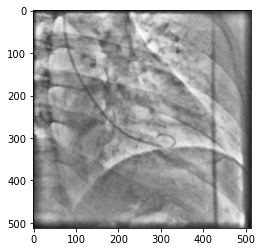

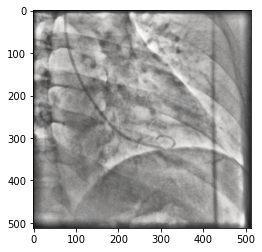

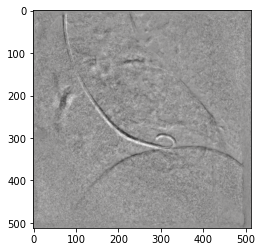

In [5]:
print(bool(batch_data['contrast_exist'][i].item()))
plt.imshow(batch_data['original']['image'][i,0],cmap='gray')
plt.show()
plt.imshow(batch_data['original']['image'][i,1],cmap='gray')
plt.show()
plt.imshow(batch_data['original']['image'][i,2],cmap='gray')
plt.show()
plt.imshow(batch_data['original']['mask'][i],cmap='gray')
plt.show()

plt.imshow(batch_data['original']['image'][i,0],cmap='gray')
plt.imshow(batch_data['original']['mask'][i],cmap='Reds',alpha=0.1)
plt.show()
plt.imshow(batch_data['original']['image'][i,1],cmap='gray')
plt.imshow(batch_data['original']['mask'][i],cmap='Reds',alpha=0.1)
plt.show()
plt.imshow(batch_data['original']['image'][i,2],cmap='gray')
plt.imshow(batch_data['original']['mask'][i],cmap='Reds',alpha=0.1)
plt.show()

In [6]:
from  core.utils.dataloaders import InferenceDataLoader

dataset = InferenceDataLoader('dcm',r'D:\Datasets\Cardiac_Catheterization\test',Config)(batch_size=8,num_workers=0,pin_memory=False,prefetch_factor=2)

In [7]:
for path, data in dataset:
    i = 0
    for batch_data in data(1):
        i+=1
        if i == 10:
            break
    break

EPOCH: 1:  45%|████▌     | 9/20 [00:00<00:00, 18.02it/s]


In [8]:
batch_data['frame']

tensor([73, 74, 75, 76, 77, 78, 79, 80])

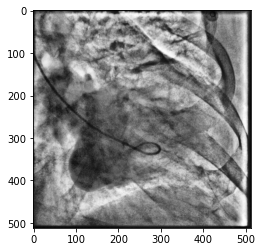

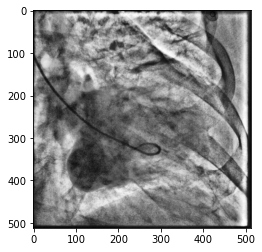

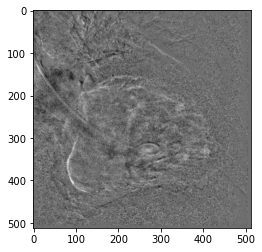

In [9]:
i = 6
plt.imshow(batch_data['image'][i,0],cmap='gray')
plt.show()
plt.imshow(batch_data['image'][i,1],cmap='gray')
plt.show()
plt.imshow(batch_data['image'][i,2],cmap='gray')
plt.show()